264
(264, 264)


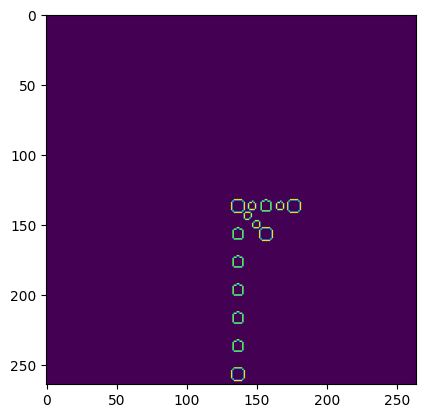

center_image1 [[136.5        136.5       ]
 [136.41666667 156.5       ]
 [136.5        176.5       ]
 [136.4375     146.5       ]
 [136.4375     166.5       ]
 [143.33333333 143.33333333]
 [149.66666667 149.66666667]
 [156.41666667 136.5       ]
 [156.5        156.5       ]
 [176.41666667 136.5       ]
 [196.41666667 136.5       ]
 [216.41666667 136.5       ]
 [236.41666667 136.5       ]
 [256.5        136.5       ]]
center_image2 [[136.5        136.5       ]
 [136.45833333 156.5       ]
 [136.5        176.5       ]
 [136.375      146.5       ]
 [136.375      166.5       ]
 [143.33333333 143.33333333]
 [146.375      136.5       ]
 [149.66666667 149.66666667]
 [156.46428571 156.5       ]
 [156.45833333 136.5       ]
 [166.375      136.5       ]
 [176.45833333 136.5       ]
 [186.375      136.5       ]
 [196.45833333 136.5       ]
 [206.375      136.5       ]
 [216.5        136.5       ]]
264
(264, 264)


In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

# Load the data
binary_image1 = np.load('CerclesI1.npy')
print(binary_image1.shape[0])
binary_image2 = np.load('CerclesI2.npy')
print(binary_image2.shape)
center_image1= np.load('CerclesC1.npy')
plt.imshow(binary_image1)
plt.show()
print("center_image1",center_image1)
center_image2= np.load('CerclesC2.npy')
print("center_image2",center_image2)
# Load the data
CerclesSegmented1 = np.load('CerclesSegmented1.npy')
print(CerclesSegmented1.shape[0])
CerclesSegmented2 = np.load('CerclesSegmented2.npy')
print(CerclesSegmented2.shape)


In [16]:
# Object points in 3D space
objp = np.array([
    [0, 0, 0],
    [0.7,0.7,0],
    [0, 1, 0],
    [1.31,1.31,0],   
    [0, 2, 0],
    [2,2,0],
    [0, 3, 0],
    [0, 4, 0],
    
    


], dtype=np.float32)
print(objp)
# Image points in 2D space for image 1
import numpy as np

# Assuming `center_image1` and `center_image2` are arrays or lists containing coordinates

# Image points in 2D space for image 1
imgpoints1 = np.array([
    [center_image1[0][0], center_image1[0][1]],
    [center_image1[5][0], center_image1[5][1]],
    [center_image1[3][0], center_image1[3][1]],
    [center_image1[6][0], center_image1[6][1]],
    [center_image1[1][0], center_image1[1][1]],
    [center_image1[8][0], center_image1[8][1]],
    [center_image1[4][0], center_image1[4][1]],
    [center_image1[2][0], center_image1[2][1]],
   
    

], dtype=np.float32)
imgpoints1 = np.reshape(imgpoints1, (-1,1,2))
# Image points in 2D space for image 2
imgpoints2 = np.array([
    [center_image2[0][0], center_image2[0][1]],
    [center_image2[5][0], center_image2[5][1]],
    [center_image2[3][0], center_image2[3][1]],
    [center_image2[7][0], center_image2[7][1]],
    [center_image2[1][0], center_image2[1][1]],
    [center_image2[8][0], center_image2[8][1]],
    
    [center_image2[4][0], center_image2[4][1]],
    [center_image2[2][0], center_image2[2][1]],
    

], dtype=np.float32)
imgpoints2 = np.reshape(imgpoints2, (-1,1,2))
print(imgpoints2)

[[0.   0.   0.  ]
 [0.7  0.7  0.  ]
 [0.   1.   0.  ]
 [1.31 1.31 0.  ]
 [0.   2.   0.  ]
 [2.   2.   0.  ]
 [0.   3.   0.  ]
 [0.   4.   0.  ]]
[[[136.5     136.5    ]]

 [[143.33333 143.33333]]

 [[136.375   146.5    ]]

 [[149.66667 149.66667]]

 [[136.45833 156.5    ]]

 [[156.46428 156.5    ]]

 [[136.375   166.5    ]]

 [[136.5     176.5    ]]]


In [17]:
img = cv.imread("CerclesC1.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [18]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

image_size = (binary_image1.shape[0], binary_image1.shape[1])
print(image_size)
# Here, you need to specify your initial guess for the intrinsic matrix
initial_intrinsic_matrix = np.array([[7.5, 0, len(gray)/2],
                                     [0, 7.5, len(gray)/2],
                                     [0, 0, 1]])
for imgp in [imgpoints1,imgpoints2]:
    objpoints.append(objp)
    imgpoints.append(imgp)

    ret,mtx,dist,rvecs,tvecs = cv.calibrateCamera(objpoints,imgpoints, gray.shape[::-1], initial_intrinsic_matrix,None,None, flags=cv.CALIB_USE_INTRINSIC_GUESS)

(264, 264)


In [19]:
print(rvecs)
print("rvecs1",rvecs[0])
print("rvecs2",rvecs[1])
##matrice de rotation => convertir le vecteur en matrice
print("(rvecs[0])[0] ",(rvecs[0])[0] )
rmatRight = cv.Rodrigues(rvecs[0])[0] 
print("rmatRight",rmatRight)
rmatLeft = cv.Rodrigues(rvecs[1])[0]  

print("tvecs[0]",tvecs[0])
print("tvecs[1]",tvecs[1])
#matrice complète [R|t] => ajouter t dans R
rotMatRight = np.concatenate((rmatRight,tvecs[0]), axis=1)
print("rotMatRight",rotMatRight)
rotMatLeft = np.concatenate((rmatLeft,tvecs[1]), axis=1)
print("rotMatLeft",rotMatLeft)

(array([[ 3.37097751e-05],
       [-1.23806283e-04],
       [-9.52385366e-04]]), array([[ 3.85115359e-05],
       [-1.00756419e-04],
       [-6.32689970e-04]]))
rvecs1 [[ 3.37097751e-05]
 [-1.23806283e-04]
 [-9.52385366e-04]]
rvecs2 [[ 3.85115359e-05]
 [-1.00756419e-04]
 [-6.32689970e-04]]
(rvecs[0])[0]  [3.37097751e-05]
rmatRight [[ 9.99999539e-01  9.52383133e-04 -1.23822316e-04]
 [-9.52387307e-04  9.99999546e-01 -3.36508143e-05]
 [ 1.23790211e-04  3.37687255e-05  9.99999992e-01]]
tvecs[0] [[-10.3431257 ]
 [-10.34005491]
 [  0.7489862 ]]
tvecs[1] [[-10.3444483 ]
 [-10.34053421]
 [  0.74901851]]
rotMatRight [[ 9.99999539e-01  9.52383133e-04 -1.23822316e-04 -1.03431257e+01]
 [-9.52387307e-04  9.99999546e-01 -3.36508143e-05 -1.03400549e+01]
 [ 1.23790211e-04  3.37687255e-05  9.99999992e-01  7.48986205e-01]]
rotMatLeft [[ 9.99999795e-01  6.32687986e-04 -1.00768595e-04 -1.03444483e+01]
 [-6.32691866e-04  9.99999799e-01 -3.84796594e-05 -1.03405342e+01]
 [ 1.00744230e-04  3.85434070e-05  9.9

In [20]:
#matrice de la camera @ RT
camLeft = mtx @ rotMatLeft
camRight = mtx @ rotMatRight

# trouver cx et cy (coo centre optique dans limage) pour les 2 cameras
camWorldCenterLeft = np.linalg.inv(np.concatenate((rotMatLeft,[[0,0,0,1]]), axis=0)) @ np.transpose([[0,0,0,1]])
print(camWorldCenterLeft)


camWorldCenterRight = np.linalg.inv(np.concatenate((rotMatRight,[[0,0,0,1]]), axis=0)) @ np.transpose([[0,0,0,1]])
print('Centre Gauche\n',camWorldCenterLeft) #1colonne à 4lignes
print('Centre right\n', camWorldCenterRight) #1colonne à 4lignes
def crossMat(v):
    v = v[:, 0]   # Matrice ligne afin d'accéder plus facilement aux valeurs v[1]...
    return np.array([[0, -v[2], v[1]],
                     [v[2], 0, -v[0]],
                     [-v[1], v[0], 0]])

def matFondamental(camLeft,centerRight,camRight):
        
        return np.array((crossMat(camLeft @ centerRight)) @ camLeft @ np.linalg.pinv(camRight))
    


[[10.33782835]
 [10.34704807]
 [-0.7504588 ]
 [ 1.        ]]
Centre Gauche
 [[10.33782835]
 [10.34704807]
 [-0.7504588 ]
 [ 1.        ]]
Centre right
 [[10.33318048]
 [10.34987554]
 [-0.75061486]
 [ 1.        ]]


In [21]:
def mark_circle_centers(binary_image, center_image):
    # Create a new image with the same dimensions as binary_image
    center_marked_image = np.zeros_like(binary_image)
    
    # Iterate through each center and mark it as 1
    for center in center_image:
        # Retrieve center coordinates
        center_x, center_y = int(center[1]), int(center[0])  # Convert to integers
        
        # Ensure the center coordinates are within the bounds of the image
        if 0 <= center_x < binary_image.shape[1] and 0 <= center_y < binary_image.shape[0]:
            # Mark the center as 1 in the new image
            center_marked_image[center_y, center_x] = 1
    
    return center_marked_image

In [24]:
import numpy as np
import cv2 as cv

def back_project(mtx, rvecs, tvecs, points2D):
    # Ensure that points2D is in the correct shape (N, 1, 2) or (N, 2)
    points2D = np.array(points2D, dtype='float32').reshape(-1, 1, 2)
    
    # Convert 2D points to homogeneous coordinates (N, 1, 3)
    points2D_hom = cv.convertPointsToHomogeneous(points2D).reshape(-1, 3)  # Reshape to (N, 3)

    # Inverse camera matrix for back-projection
    inv_cam_mat = np.linalg.inv(mtx)

    # Transform 2D points into 3D using the inverse camera matrix
    points3D = np.dot(inv_cam_mat, points2D_hom.T)  # Now 3xN

    # Apply the inverse rotation
    rot_inv = np.linalg.inv(cv.Rodrigues(rvecs)[0])
    trans_inv = -np.dot(rot_inv, tvecs)

    # Add the inverse translation
    points3D = np.dot(rot_inv, points3D) + trans_inv[:, np.newaxis]

    return points3D.T  # Transpose to return in format Nx3

# Example usage
# Make sure you have mtx, rvecs, tvecs defined, and points2D prepared
# points2D should be a list or an array of points (N, 1, 2) or (N, 2)
# Assuming you have imgpoints1 correctly loaded and shaped for input
points3D = back_project(mtx, rvecs[0], tvecs[0], imgpoints1)  # Use correctly prepared points here
print(points3D)



[[[ -3.45354609  -3.43685103 -14.53734143]
  [ -3.4799232   -3.46322814 -14.56371854]
  [ 11.3353536   11.35204866   0.25155826]]

 [[ -2.54330383  -2.52660877 -13.62709917]
  [ -2.5679454   -2.55125034 -13.65174074]
  [ 11.33521012  11.35190518   0.25141479]]

 [[ -3.46314927  -3.44645421 -14.54694461]
  [ -2.14659833  -2.12990327 -13.23039367]
  [ 11.33530976  11.35200482   0.25151443]]

 [[ -1.69966268  -1.68296762 -12.78345802]
  [ -1.7226957   -1.70600064 -12.80649103]
  [ 11.33507715  11.3517722    0.25128181]]

 [[ -3.46719622  -3.45050116 -14.55099156]
  [ -0.81326817  -0.79657311 -11.8970635 ]
  [ 11.33526524  11.3519603    0.2514699 ]]

 [[ -0.78942042  -0.77272536 -11.87321575]
  [ -0.8107179   -0.79402284 -11.89451323]
  [ 11.33493367  11.35162873   0.25113833]]

 [[ -3.46568897  -3.44899391 -14.54948431]
  [  0.52006729   0.53676234 -10.56372805]
  [ 11.33522003  11.35191509   0.25142469]]

 [[ -3.45862549  -3.44193043 -14.54242083]
  [  1.85340803   1.87010309  -9.2303873

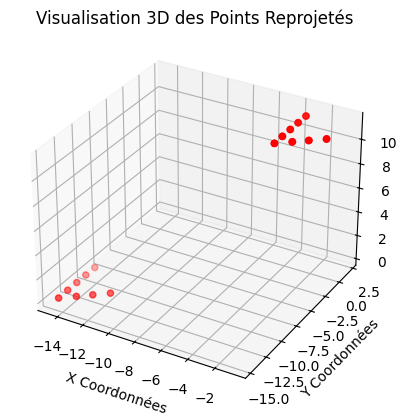

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Créer une figure pour le tracé 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Supposons que points3D soit votre array de points reprojétés en 3D
# points3D est un array de forme (N, 3) où chaque ligne est (x, y, z)

# Extraire x, y, z pour la visualisation
x_vals = points3D[:, 0]
y_vals = points3D[:, 1]
z_vals = points3D[:, 2]

# Ajouter les points au graphique
ax.scatter(x_vals, y_vals, z_vals, c='r', marker='o')  # 'r' est la couleur rouge

# Nommer les axes
ax.set_xlabel('X Coordonnées')
ax.set_ylabel('Y Coordonnées')
ax.set_zlabel('Z Coordonnées')

# Titre du graphique
ax.set_title('Visualisation 3D des Points Reprojetés')

# Afficher le graphique
plt.show()
